<a href="https://colab.research.google.com/github/samantha-isaac/School-Shootings-Visual-Analysis/blob/main/VA_Cleaning_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
filename = '/content/drive/MyDrive/M.S. Data Science/Visual Analytics/Final Project/datasets/school-shootings-data.csv'
df = pd.read_csv(filename)
df.head()

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,39.603910,-105.075000,89.6,9,12,41,Jefferson County,8,8059,21.0
1,2,220054000422,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,...,30.529958,-91.169966,39.0,6,8,495,East Baton Rouge Parish,22,22033,12.0
2,3,130441001591,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,...,33.626922,-84.047960,84.0,9,12,125,Rockdale County,13,13247,21.0
3,4,421899003847,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,...,39.921509,-75.234108,41.0,9,12,2007,Philadelphia County,42,42101,11.0
4,5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,...,42.285268,-71.075901,NaN,9,12,543,Suffolk County,25,25025,11.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uid                               387 non-null    int64  
 1   nces_school_id                    381 non-null    object 
 2   school_name                       387 non-null    object 
 3   nces_district_id                  363 non-null    float64
 4   district_name                     362 non-null    object 
 5   date                              387 non-null    object 
 6   school_year                       387 non-null    object 
 7   year                              387 non-null    int64  
 8   time                              363 non-null    object 
 9   day_of_week                       387 non-null    object 
 10  city                              387 non-null    object 
 11  state                             387 non-null    object 
 12  school_t

In [ ]:
df.duplicated().sum()

0

In [ ]:
datos_faltantes = df.isnull().sum().reset_index()
datos_faltantes.columns = ['Columns', 'Missing values']
datos_faltantes['Total Records'] = len(df)
percentage_missingValues = (datos_faltantes['Missing values'] / len(df)) * 100
datos_faltantes['Percentage of Missing Data'] = percentage_missingValues.round(2)

datos_faltantes.sort_values(by = 'Missing values', ascending = False)

,Columns,Missing values,Total Records,Percentage of Missing Data
29,deceased_notes2,386,387,99.74
28,shooter_deceased2,381,387,98.45
27,shooter_relationship2,381,387,98.45
26,race_ethnicity_shooter2,380,387,98.19
24,age_shooter2,375,387,96.90
25,gender_shooter2,375,387,96.90
23,deceased_notes1,349,387,90.18
39,weapon_source,282,387,72.87
20,race_ethnicity_shooter1,239,387,61.76
38,weapon,138,387,35.66


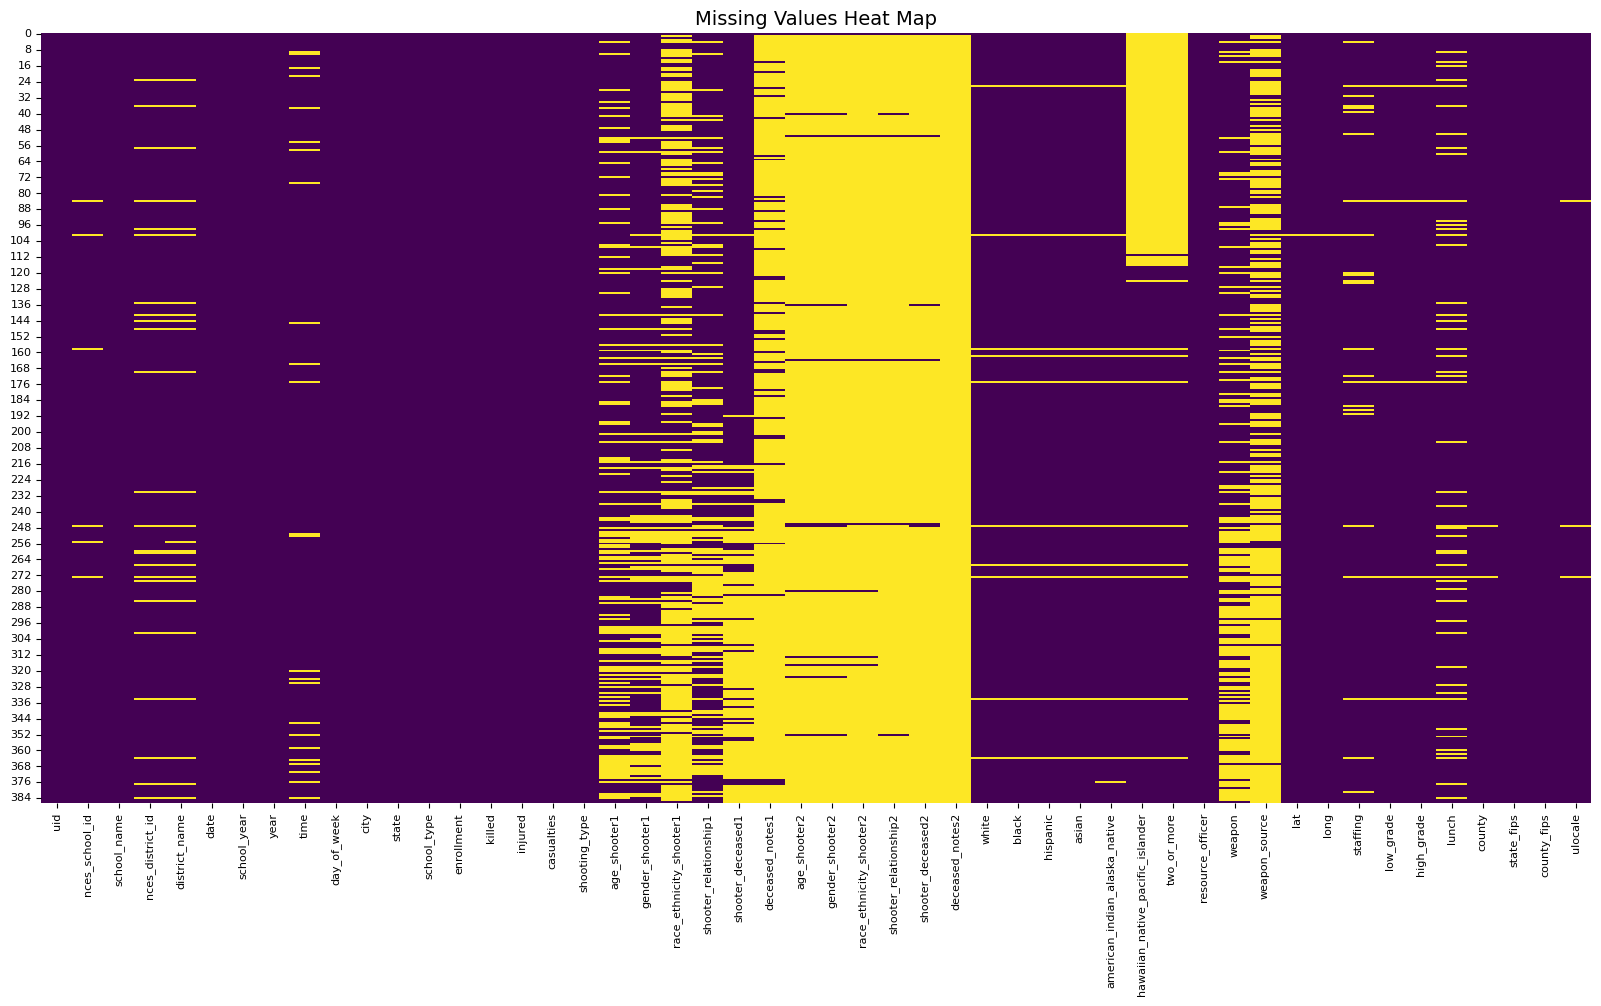

In [ ]:
plt.figure(figsize=(20, 10))
# Creando el mapa de calor utilizando seaborn
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# Ajustando la rotación de las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)  # Ajustar el tamaño de la fuente de las etiquetas del eje y
plt.title('Missing Values Heat Map', fontsize=14)
plt.show();

Eliminar las columnas del segundo shooter

In [ ]:
# Creando la nueva columna "presence_second_shooter" basada en las columnas especificadas
columns_to_check = ['age_shooter2', 'gender_shooter2', 'race_ethnicity_shooter2',
                    'shooter_relationship2', 'shooter_deceased2', 'deceased_notes2']

# Si alguna de las columnas tiene un valor no nulo, entonces marcamos como 1, de lo contrario 0
df['presence_second_shooter'] = df[columns_to_check].notnull().any(axis=1).astype(int)

# Verificando la creación de la columna
df[['presence_second_shooter'] + columns_to_check].head()

# Eliminar las columnas
df.drop(columns=columns_to_check, inplace=True)

In [ ]:
df['presence_second_shooter'].value_counts()

0    375
1     12
Name: presence_second_shooter, dtype: int64

In [ ]:
columns_to_delete = ['uid', 'nces_school_id', 'nces_district_id', 'deceased_notes1',
                     'white', 'black', 'hispanic', 'asian', 'american_indian_alaska_native',
                     'hawaiian_native_pacific_islander', 'two_or_more', 'state_fips', 'county_fips']

df.drop(columns = columns_to_delete, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school_name              387 non-null    object 
 1   district_name            362 non-null    object 
 2   date                     387 non-null    object 
 3   school_year              387 non-null    object 
 4   year                     387 non-null    int64  
 5   time                     363 non-null    object 
 6   day_of_week              387 non-null    object 
 7   city                     387 non-null    object 
 8   state                    387 non-null    object 
 9   school_type              387 non-null    object 
 10  enrollment               387 non-null    object 
 11  killed                   387 non-null    int64  
 12  injured                  387 non-null    int64  
 13  casualties               387 non-null    int64  
 14  shooting_type            3

Asignando valor 'Unknown' a columnas categoricas importantes

In [ ]:
# Asignando la etiqueta 'Desconocido' a los valores nulos en las columnas con una alta cantidad de valores nulos
columns_to_replace = ['weapon_source', 'race_ethnicity_shooter1', 'weapon', 'shooter_relationship1', 'district_name']

for column in columns_to_replace:
    df[column].fillna('Unknown', inplace=True)

# Verificando los cambios realizados
df[columns_to_replace].isnull().sum()

weapon_source              0
race_ethnicity_shooter1    0
weapon                     0
shooter_relationship1      0
district_name              0
dtype: int64

In [ ]:
# Limpiando y convirtiendo a formato numérico las columnas 'staffing' y 'lunch'
# Eliminando comas y convirtiendo a flotante
columns_to_replace_numeric = ['staffing', 'lunch']

for column in ['staffing', 'lunch']:
    df[column] = df[column].replace(',', '', regex=True).astype(float)

# Intentando nuevamente reemplazar los valores nulos
for column in columns_to_replace_numeric:
    if column in ['staffing', 'lunch']:
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

# Verificando los cambios realizados
df[columns_to_replace_numeric].isnull().sum()


staffing    0
lunch       0
dtype: int64

In [ ]:
# Reemplazando los valores nulos en 'staffing' y 'lunch' con la mediana
for column in ['staffing', 'lunch']:
    df[column].fillna(df[column].median(), inplace=True)

# Verificando los cambios realizados
df[['staffing', 'lunch']].isnull().sum()

staffing    0
lunch       0
dtype: int64

Agregar la moda a las columnas de 'low_grade' y 'high_grade'

In [ ]:
# Reemplazando los valores nulos en 'low_grade' y 'high_grade' con la moda (el valor más frecuente)
for column in ['low_grade', 'high_grade']:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

# Verificando los cambios realizados
df[['low_grade', 'high_grade']].isnull().sum()

low_grade     0
high_grade    0
dtype: int64

In [ ]:
# Revisando nuevamente los valores únicos en 'low_grade' y 'high_grade'
unique_low_grade_after = df['low_grade'].unique()
unique_high_grade_after = df['high_grade'].unique()

unique_low_grade_after, unique_high_grade_after


(array(['9', '6', 'KG', 'PK', '7', '8', '11', '3', '5', 'K', '4', '10',
        '1'], dtype=object),
 array(['12', '8', '7', '5', '6', '4', '11', 'PK', '9', '10'], dtype=object))

In [ ]:
df['shooter_deceased1'].fillna(3, inplace = True)
df['shooter_deceased1'].value_counts()

0.0    222
3.0    125
1.0     40
Name: shooter_deceased1, dtype: int64

In [ ]:
df = df.dropna(subset=['lat', 'long', 'county', 'ulocale'])

In [ ]:
df['gender_shooter1'].value_counts()

m    292
f     14
h      1
Name: gender_shooter1, dtype: int64

In [ ]:
df['gender_shooter1'] = df['gender_shooter1'].replace('h', 'm')

<ipython-input-19-c020bce6d607>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender_shooter1'] = df['gender_shooter1'].replace('h', 'm')


In [ ]:
df['age_shooter1'].fillna((df['age_shooter1'].mean()), inplace = True)

<ipython-input-20-22ef80a3feb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_shooter1'].fillna((df['age_shooter1'].mean()), inplace = True)


In [ ]:
df['gender_shooter1'].fillna((df['gender_shooter1'].mode()), inplace = True)

<ipython-input-21-0c2a321f4104>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender_shooter1'].fillna((df['gender_shooter1'].mode()), inplace = True)


In [ ]:
df['time'] = pd.to_datetime(df['time']).dt.time

In [ ]:
df['race_ethnicity_shooter1'] = df['race_ethnicity_shooter1'].replace('Hispanic', 'h')
df['race_ethnicity_shooter1'] = df['race_ethnicity_shooter1'].replace('m', 'Unknown')
df['race_ethnicity_shooter1'] = df['race_ethnicity_shooter1'].replace('n', 'Unknown')

In [ ]:
df['age_shooter1'] = df['age_shooter1'].apply(lambda x: int(round(x)))


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 386
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school_name              383 non-null    object 
 1   district_name            383 non-null    object 
 2   date                     383 non-null    object 
 3   school_year              383 non-null    object 
 4   year                     383 non-null    int64  
 5   time                     359 non-null    object 
 6   day_of_week              383 non-null    object 
 7   city                     383 non-null    object 
 8   state                    383 non-null    object 
 9   school_type              383 non-null    object 
 10  enrollment               383 non-null    object 
 11  killed                   383 non-null    int64  
 12  injured                  383 non-null    int64  
 13  casualties               383 non-null    int64  
 14  shooting_type            3

In [ ]:
# Guardar el DataFrame en un archivo CSV
# df.to_csv('/content/drive/MyDrive/M.S. Data Science/Visual Analytics/Final Project/datasets/clean_FINAL.csv', index=False)

VERIFICAR QUE LA INFORMACIÓN ESTÉ BIEN EN LOS GRÁFICOS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 386
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school_name              383 non-null    object 
 1   district_name            383 non-null    object 
 2   date                     383 non-null    object 
 3   school_year              383 non-null    object 
 4   year                     383 non-null    int64  
 5   time                     359 non-null    object 
 6   day_of_week              383 non-null    object 
 7   city                     383 non-null    object 
 8   state                    383 non-null    object 
 9   school_type              383 non-null    object 
 10  enrollment               383 non-null    object 
 11  killed                   383 non-null    int64  
 12  injured                  383 non-null    int64  
 13  casualties               383 non-null    int64  
 14  shooting_type            3

In [ ]:
# Calcular el total de incidentes por ciudad para ver la ciudad más propensa a estos incidentes
df['city'].value_counts()

Chicago         8
Los Angeles     8
Philadelphia    7
Baltimore       6
Washington      6
               ..
Fort Myers      1
Taft            1
Homestead       1
Pine Hills      1
Warren          1
Name: city, Length: 286, dtype: int64

In [ ]:
df['state'].value_counts()

California              40
Texas                   25
Florida                 24
North Carolina          21
Michigan                16
Pennsylvania            16
Illinois                16
Alabama                 15
Ohio                    14
Tennessee               14
Louisiana               13
Georgia                 12
New York                11
Maryland                10
Colorado                 9
Washington               9
Virginia                 9
South Carolina           9
Indiana                  8
New Mexico               7
Minnesota                7
Wisconsin                6
Oregon                   6
District of Columbia     6
Missouri                 6
Mississippi              6
Nevada                   5
Arkansas                 5
Oklahoma                 4
Utah                     4
Arizona                  4
Connecticut              4
Kentucky                 3
Massachusetts            3
Delaware                 2
Kansas                   2
New Jersey               2
I

In [ ]:
df['age_shooter1'].mean()

19.138381201044385

In [ ]:
df['race_ethnicity_shooter1'].value_counts()

Unknown    240
w           71
b           60
h            9
ai           2
a            1
Name: race_ethnicity_shooter1, dtype: int64

In [ ]:
df['shooting_type'].value_counts()

targeted                       220
indiscriminate                  63
accidental                      51
unclear                         29
public suicide                   8
targeted and indiscriminate      6
accidental or targeted           2
hostage suicide                  2
public suicide (attempted)       1
suicide                          1
Name: shooting_type, dtype: int64

In [ ]:
df['age_shooter1'].value_counts()

19    126
15     48
16     39
17     36
14     31
18     18
13     11
12      9
28      6
20      5
21      4
8       3
53      3
6       3
22      3
25      2
44      2
32      2
38      2
26      2
45      2
23      2
47      2
41      2
30      2
11      2
34      1
72      1
55      1
29      1
54      1
24      1
56      1
7       1
50      1
48      1
42      1
49      1
9       1
39      1
33      1
27      1
Name: age_shooter1, dtype: int64

In [ ]:
df['year'].value_counts()

2022    46
2021    41
2018    30
2023    28
2019    26
2014    16
2017    15
2006    14
2005    13
2013    13
2016    13
2001    13
2000    12
2003    12
2012    11
2007    10
2004     9
2020     9
2010     9
2009     9
2008     8
1999     7
2015     7
2011     7
2002     5
Name: year, dtype: int64

In [ ]:
df.groupby('year')['casualties'].sum()

year
1999    49
2000     7
2001    27
2002     8
2003    13
2004    12
2005    26
2006    15
2007    18
2008     8
2009     5
2010     9
2011    11
2012    40
2013    16
2014    20
2015     2
2016    20
2017    21
2018    95
2019    24
2020     6
2021    45
2022    90
2023    29
Name: casualties, dtype: int64

In [ ]:
df.groupby('year')['killed'].sum()

year
1999    14
2000     4
2001     5
2002     1
2003     5
2004     3
2005     9
2006     4
2007     1
2008     4
2009     1
2010     3
2011     2
2012    32
2013     3
2014     6
2015     0
2016     2
2017     5
2018    33
2019     4
2020     1
2021     9
2022    34
2023    10
Name: killed, dtype: int64